In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('data.csv',index_col=False)

# EDA

BASIC questions to be answered
1. how data looks like?
2. Is there any duplicate rows in dataset?
    - if yes, then what is the precentage of duplicates?
3. Is there any null values in dataset?
    - if yes, 
        - should null be droped?
        - is there any pattern in missing values?
        - can we impute them?
4. what are the datatypes of columns?
    - if there are categorical columns then should we encode then are they nominal or ordinal
5. how data is divided into categories based on columns like who region and world bank income level?
6. What are the basic statistical summaries for numerical columns (mean, median, min, max, standard deviation)?
      - Are there any outliers in numerical columns?
7. How is data distributed for each numerical column? (histograms, KDE plots)
      - Are there any skewed distributions?
8. How have indicators like life expectancy, population growth rate, or health expenditure changed over the years?
9. What is the distribution of countries by `WHO Region` and `World Bank Income Level`?
10. How do health indicators vary by `WHO Region` or `World Bank Income Level`?

##### How data looks like?

In [50]:
df.head(3)

,name,health_expenditure,who_region,world_bank_income_level,population_growth_rate,year,population,life_expectancy,health_life_expectancy,Number of new HIV infections,Suicide deaths,Adult obesity,Tobacco use,Alcohol consumption,Prevalence of hypertension
0,Afghanistan,21.83,Eastern Mediterranean,Low income (LIC),2.2%,2000,NaN,55.00,46.80,0.0,4.1,2.1%,20.0%,0.0,44.24983723684582%
1,Afghanistan,21.83,Eastern Mediterranean,Low income (LIC),2.2%,2001,NaN,55.49,47.23,0.0,4.9,2.1%,20.0%,0.0,35.83969427707559%
2,Afghanistan,21.83,Eastern Mediterranean,Low income (LIC),2.2%,2002,NaN,55.98,47.66,0.0,4.9,2.1%,20.0%,0.0,43.361477343004715%


#### How many rows and columns?

In [52]:
print(df.shape)

(4850, 15)
15


#### What are the datatypes of columns?

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4850 entries, 0 to 4849
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          4850 non-null   object 
 1   health_expenditure            4850 non-null   object 
 2   who_region                    4850 non-null   object 
 3   world_bank_income_level       4725 non-null   object 
 4   population_growth_rate        4850 non-null   object 
 5   year                          4850 non-null   int64  
 6   population                    3587 non-null   float64
 7   life_expectancy               4425 non-null   float64
 8   health_life_expectancy        4850 non-null   float64
 9   Number of new HIV infections  3350 non-null   float64
 10  Suicide deaths                4550 non-null   float64
 11  Adult obesity                 4850 non-null   object 
 12  Tobacco use                   4850 non-null   object 
 13  Alc

#### Is there any duplicate values?

In [4]:
duplicates = df.duplicated()
duplicate_percentage = duplicates.sum() / len(df) * 100
print(f"Number of duplicate rows: {duplicates.sum()} ({duplicate_percentage:.2f}%)")

Number of duplicate rows: 0 (0.00%)


#### Is there any null values in any column?

In [5]:
print("Null values per column:")
print(df.isnull().sum())

Null values per column:
name                               0
health_expenditure                 0
who_region                         0
world_bank_income_level          125
population_growth_rate             0
year                               0
population                      1263
life_expectancy                  425
health_life_expectancy             0
Number of new HIV infections    1500
Suicide deaths                   300
Adult obesity                      0
Tobacco use                        0
Alcohol consumption                0
Prevalence of hypertension         0
dtype: int64


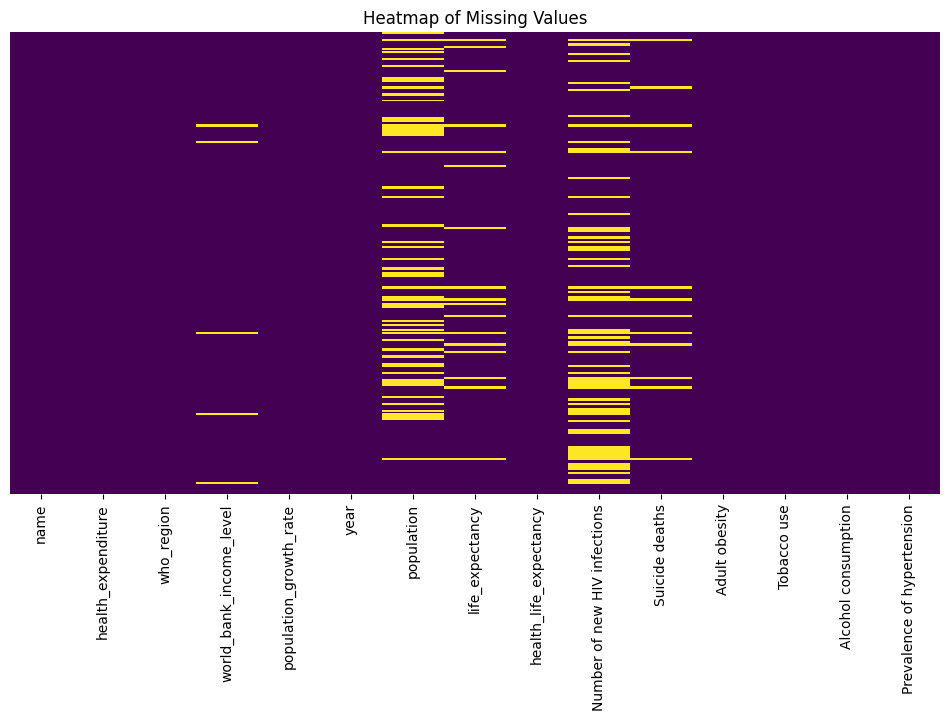

In [6]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Heatmap of Missing Values")
plt.show()

In [28]:
missing_percentage = df.isnull().mean() * 100
missing_percentage

name                             0.000000
health_expenditure               0.000000
who_region                       0.000000
world_bank_income_level          2.577320
population_growth_rate           0.000000
year                             0.000000
population                      26.041237
life_expectancy                  8.762887
health_life_expectancy           0.000000
Number of new HIV infections    30.927835
Suicide deaths                   6.185567
Adult obesity                    0.000000
Tobacco use                      0.000000
Alcohol consumption              0.000000
Prevalence of hypertension       0.000000
dtype: float64

#### Categorical Columns analysis

In [9]:
categorical_columns = ['who_region','world_bank_income_level']
print(f"Categorical columns: {categorical_columns}")
for col in categorical_columns:
    print(f"-----------------\nUnique values in {col}:")
    print(df[col].value_counts())

Categorical columns: ['who_region', 'world_bank_income_level']
-----------------
Unique values in who_region:
who_region
Europe                   1325
Africa                   1175
Americas                  875
Western Pacific           675
Eastern Mediterranean     500
South East Asia           250
Low income (LIC)           50
Name: count, dtype: int64
-----------------
Unique values in world_bank_income_level:
world_bank_income_level
High income (HIC)            1450
Lower-middle income (LMC)    1325
Upper-middle income (UMC)    1300
Low income (LIC)              650
Name: count, dtype: int64


#### Distribution of numerical columns

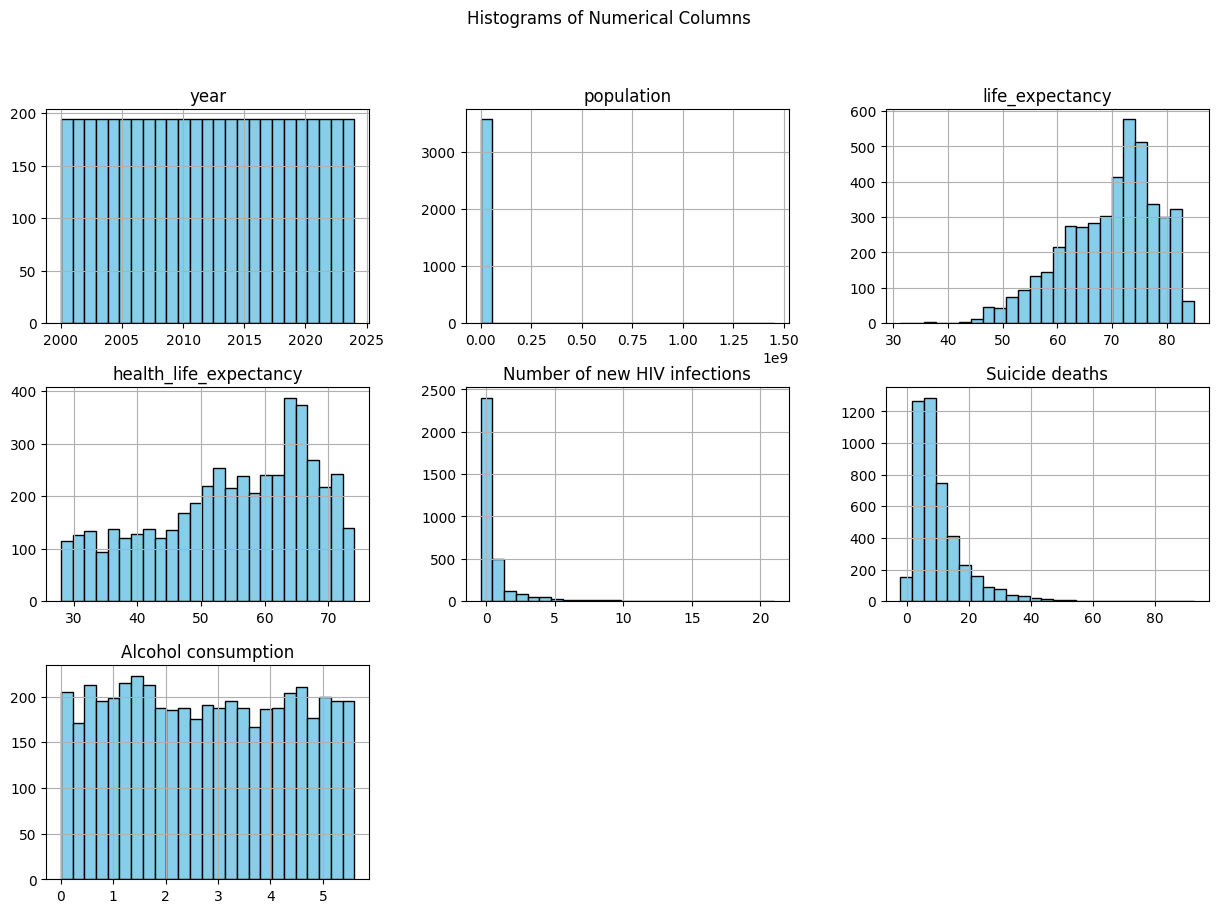

In [11]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns].hist(figsize=(15, 10), bins=25, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Columns")
plt.show()

#### How data is divided into categories based in region?

In [29]:
df['who_region'].value_counts()

who_region
Europe                   1325
Africa                   1175
Americas                  875
Western Pacific           675
Eastern Mediterranean     500
South East Asia           250
Low income (LIC)           50
Name: count, dtype: int64

/tmp/ipykernel_17092/98469275.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='who_region', order=df['who_region'].value_counts().index, palette='Set2')


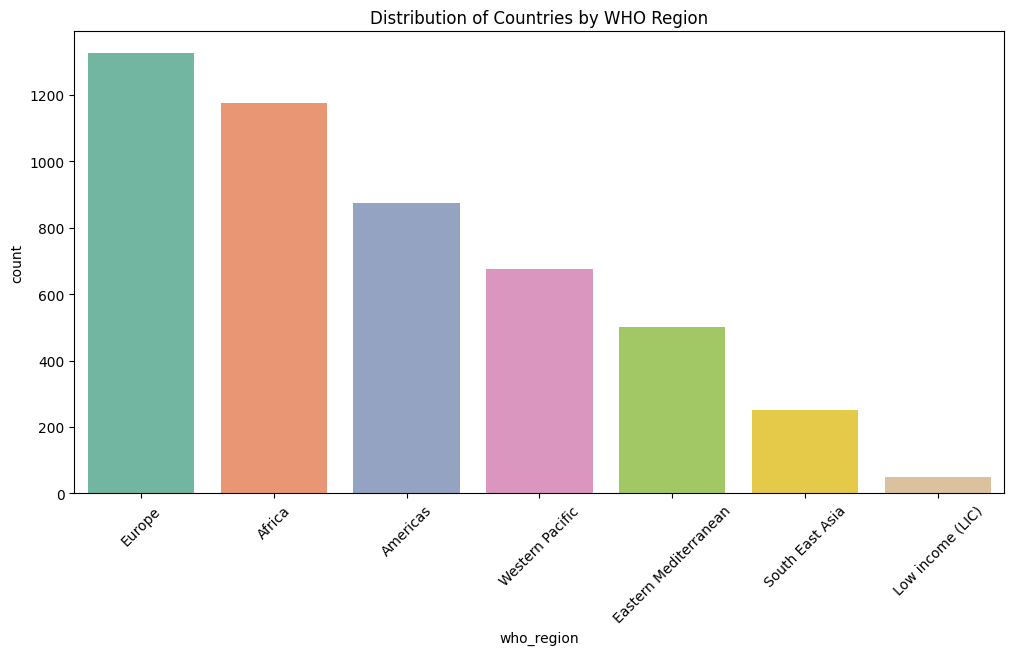

In [17]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='who_region', order=df['who_region'].value_counts().index, palette='Set2')
plt.title("Distribution of Countries by WHO Region")
plt.xticks(rotation=45)
plt.show()

#### How data is divided into categories based on world bank income level?

In [30]:
df['world_bank_income_level'].value_counts()

world_bank_income_level
High income (HIC)            1450
Lower-middle income (LMC)    1325
Upper-middle income (UMC)    1300
Low income (LIC)              650
Name: count, dtype: int64

/tmp/ipykernel_17092/2790507305.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='world_bank_income_level', order=df['world_bank_income_level'].value_counts().index, palette='Set3')


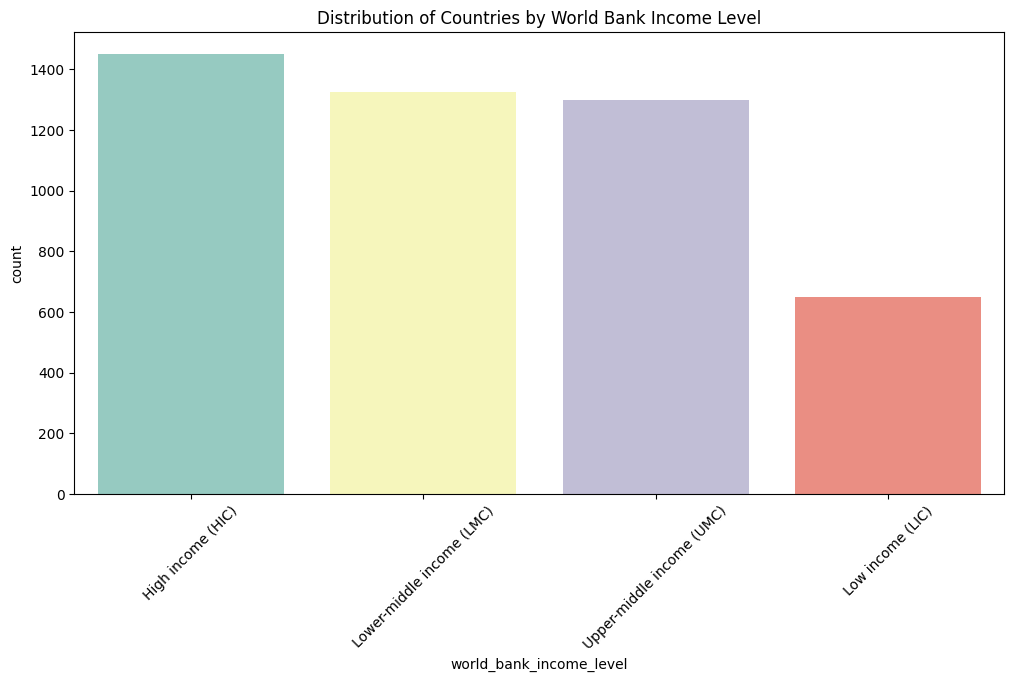

In [16]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='world_bank_income_level', order=df['world_bank_income_level'].value_counts().index, palette='Set3')
plt.title("Distribution of Countries by World Bank Income Level")
plt.xticks(rotation=45)
plt.show()

#### trend of life expectancy over years

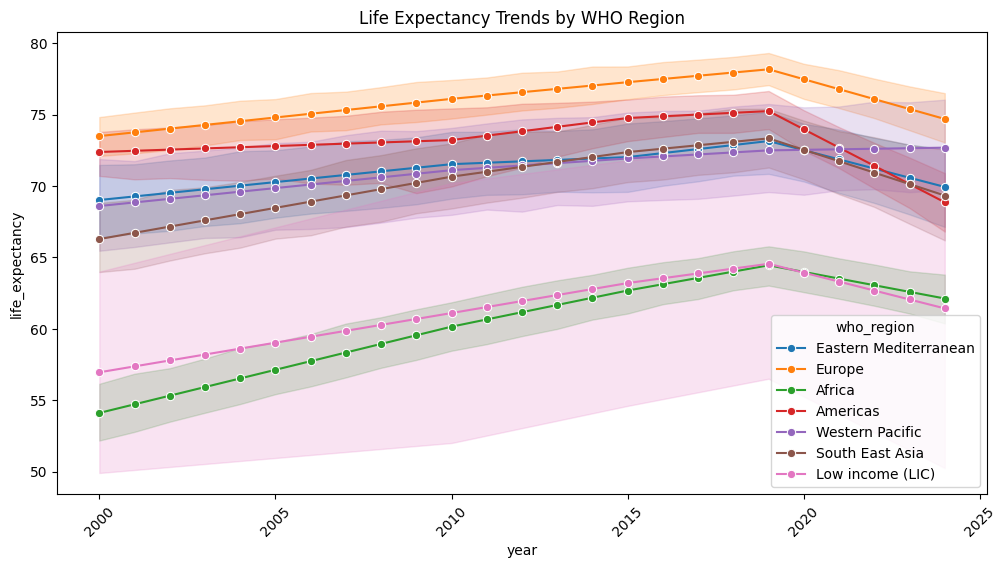

In [21]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='year', y='life_expectancy', hue='who_region', marker='o', palette='tab10')
plt.title("Life Expectancy Trends by WHO Region")
plt.xticks(rotation=45)
plt.show()

#### Outliers detection

/tmp/ipykernel_17092/756981910.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='who_region', y='health_expenditure', palette='Set1')


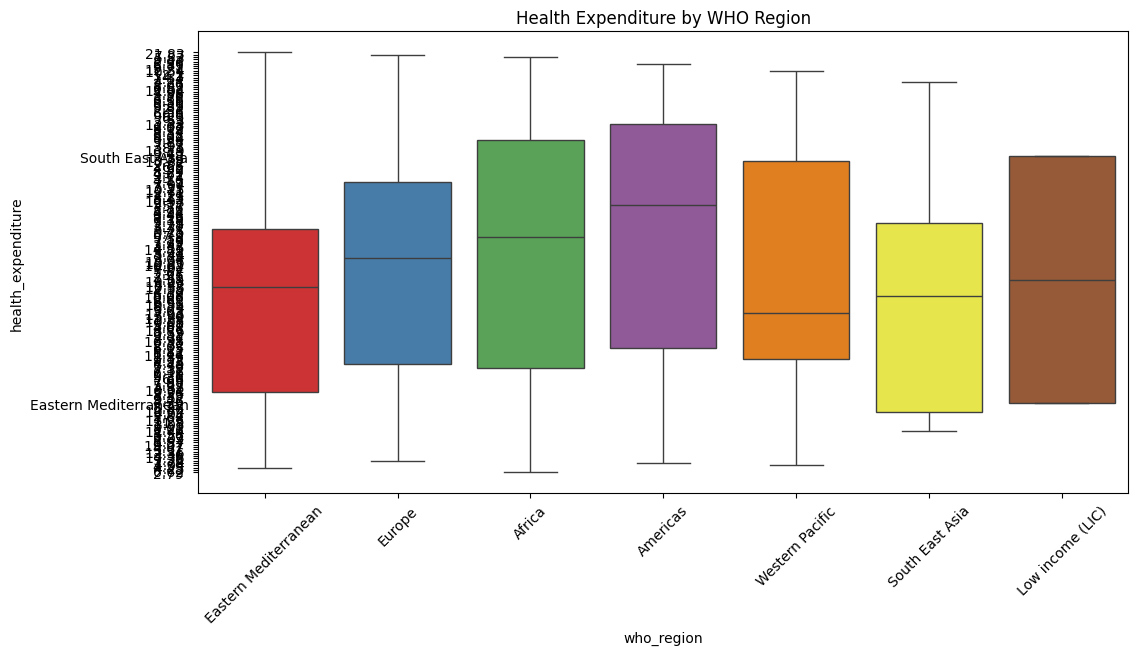

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='who_region', y='health_expenditure', palette='Set1')
plt.title("Health Expenditure by WHO Region")
plt.xticks(rotation=45)
plt.show()


/tmp/ipykernel_17092/3509121401.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='year', y='population', palette='Set1')


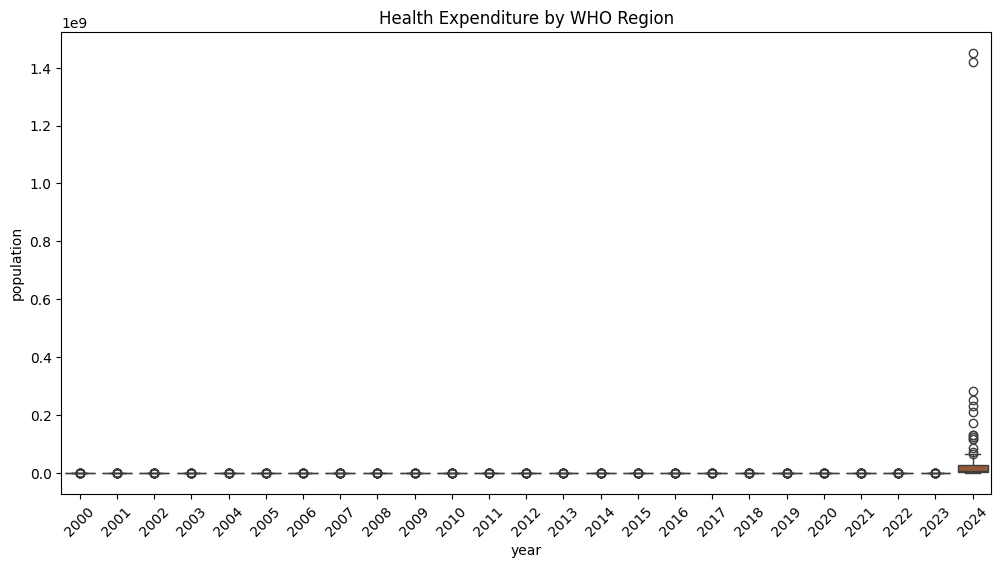

In [27]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='year', y='population', palette='Set1')
plt.title("Health Expenditure by WHO Region")
plt.xticks(rotation=45)
plt.show()


#### Statictical Analysis

In [55]:
df.describe()

,year,population,life_expectancy,health_life_expectancy,Number of new HIV infections,Suicide deaths,Alcohol consumption
count,4850.000000,3.587000e+03,4425.000000,4850.000000,3350.000000,4550.000000,4850.000000
mean,2012.000000,1.921867e+06,69.788701,54.752986,0.856269,10.355890,2.775189
std,7.211846,3.556639e+07,8.522888,12.340527,2.231096,8.754368,1.628002
min,2000.000000,0.000000e+00,31.300000,28.000000,-0.400000,-2.000000,0.000000
25%,2006.000000,5.400000e+00,64.000000,45.980989,0.000000,4.800000,1.364351
50%,2012.000000,1.540000e+01,71.660000,56.771399,0.100000,8.000000,2.763555
75%,2018.000000,6.670000e+01,75.950000,64.980000,0.600000,12.900000,4.222049
max,2024.000000,1.450940e+09,84.950000,74.100000,21.000000,92.600000,5.600000


In [56]:
df.describe(include='object')


,name,health_expenditure,who_region,world_bank_income_level,population_growth_rate,Adult obesity,Tobacco use,Prevalence of hypertension
count,4850,4850,4850,4725,4850,4850,4850,4850
unique,194,183,7,4,93,4812,4792,4826
top,Afghanistan,5.38,Europe,High income (HIC),nan%,2.1%,20.0%,41.1%
freq,25,50,1325,1450,700,18,41,19


#### others

In [64]:
df.select_dtypes(include=['int64','float64']).corr()

,year,population,life_expectancy,health_life_expectancy,Number of new HIV infections,Suicide deaths,Alcohol consumption
year,1.000000,0.088353,0.158247,0.058832,-0.167268,-0.091381,0.022821
population,0.088353,1.000000,-0.007186,0.016620,-0.016923,-0.011679,0.031752
life_expectancy,0.158247,-0.007186,1.000000,0.279863,-0.555408,-0.116359,0.018905
health_life_expectancy,0.058832,0.016620,0.279863,1.000000,-0.137101,0.000798,0.031676
Number of new HIV infections,-0.167268,-0.016923,-0.555408,-0.137101,1.000000,0.447640,0.014399
Suicide deaths,-0.091381,-0.011679,-0.116359,0.000798,0.447640,1.000000,0.019035
Alcohol consumption,0.022821,0.031752,0.018905,0.031676,0.014399,0.019035,1.000000


Text(0.5, 1.0, 'Distribution of Life Expectancy')

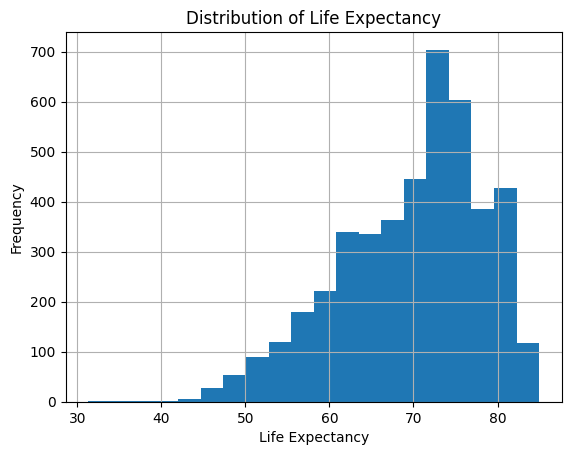

In [65]:
df['life_expectancy'].hist(bins=20)
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.title('Distribution of Life Expectancy')


<Axes: >

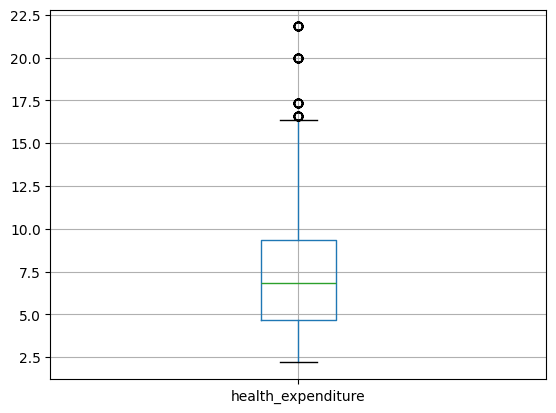

In [66]:
df['health_expenditure'] = pd.to_numeric(df['health_expenditure'], errors='coerce')
df.boxplot(column='health_expenditure')


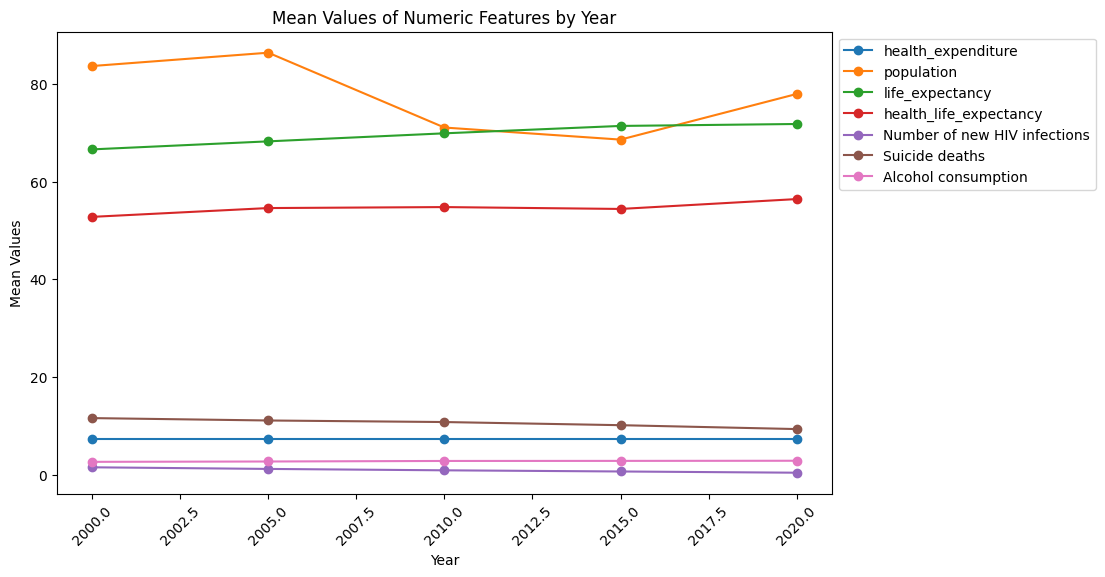

In [67]:
yearly_mean = df.select_dtypes(include=['int64', 'float64']).groupby('year').mean()

yearly_mean_reduced = yearly_mean[::5]

plt.figure(figsize=(10, 6))
for column in yearly_mean_reduced.columns:
    plt.plot(yearly_mean_reduced.index, yearly_mean_reduced[column], marker='o', label=column)

plt.xlabel('Year')
plt.ylabel('Mean Values')
plt.title('Mean Values of Numeric Features by Year')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.show()


In [68]:
df.groupby('who_region')['life_expectancy'].mean()


who_region
Africa                   60.283304
Americas                 73.149484
Eastern Mediterranean    71.162400
Europe                   75.938340
Low income (LIC)         61.225000
South East Asia          70.322200
Western Pacific          71.138667
Name: life_expectancy, dtype: float64

In [69]:
df['Tobacco use'].value_counts()


Tobacco use
20.0%                  41
30.0%                  17
23.3%                   2
26.7%                   2
27.253043320427253%     1
                       ..
26.517340686868067%     1
27.92098005921642%      1
27.17984737191993%      1
29.792601170014727%     1
24.86339621522008%      1
Name: count, Length: 4792, dtype: int64

Text(0.5, 1.0, 'Distribution of WHO Regions')

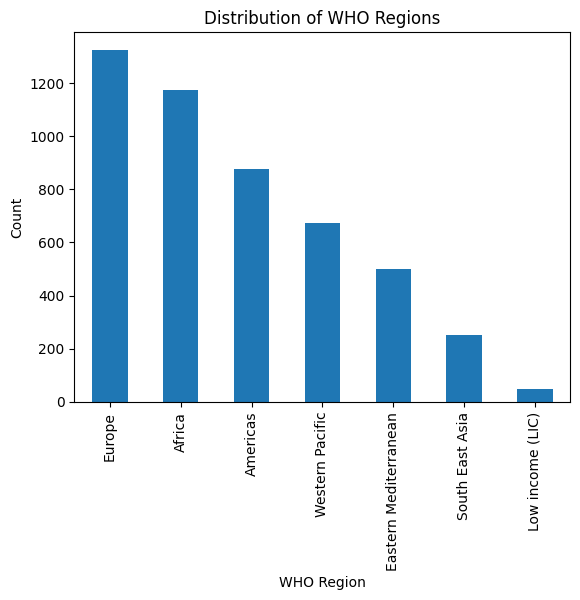

In [70]:
df['who_region'].value_counts().plot(kind='bar')
plt.xlabel('WHO Region')
plt.ylabel('Count')
plt.title('Distribution of WHO Regions')


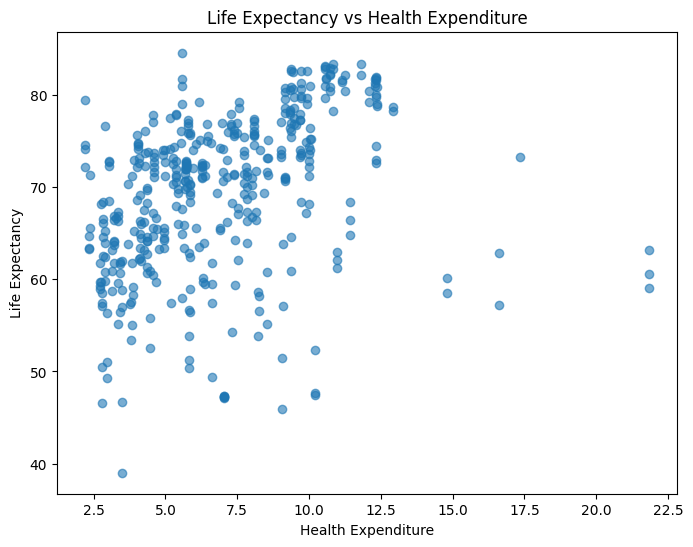

In [71]:
df_sampled = df.sample(frac=0.1, random_state=1)

plt.figure(figsize=(8, 6))
plt.scatter(df_sampled['health_expenditure'], df_sampled['life_expectancy'], alpha=0.6)
plt.xlabel('Health Expenditure')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy vs Health Expenditure')
plt.show()

# Encoding

In [72]:
from sklearn.preprocessing import LabelEncoder
from category_encoders import BinaryEncoder
import joblib


##### Ordinal Columns

In [73]:
who_region = LabelEncoder()

whoR = df['who_region']
df['who_region'] = who_region.fit_transform(df['who_region'])
joblib.dump(who_region, 'who_region_encoder.pkl')


['who_region_encoder.pkl']

In [74]:
income_level = LabelEncoder()
b = df['world_bank_income_level']
df['world_bank_income_level'] = income_level.fit_transform(df['world_bank_income_level'])
joblib.dump(income_level, 'world_bank_income_level_encoder.pkl')


['world_bank_income_level_encoder.pkl']

##### Nominal columns

In [75]:
encoder = BinaryEncoder(cols=['name'])
df = encoder.fit_transform(df)

joblib.dump(encoder, 'name_encoder.pkl')

['name_encoder.pkl']

# Feature Engineering

#### remove % marks

In [76]:
df['Adult obesity'] = df['Adult obesity'].str.rstrip('%').astype(float)

df.rename(columns={'Adult obesity': 'Adult obesity%'}, inplace=True)

In [77]:
df['population_growth_rate'] = df['population_growth_rate'].apply(lambda x: f"{x}%" if not str(x).endswith('%') else x)


In [78]:
df['population_growth_rate'] = df['population_growth_rate'].str.replace('%', '').str.replace('−', '-', regex=False).astype(float)

df.rename(columns={'population_growth_rate': 'population growth rate%'}, inplace=True)


In [79]:
df['Tobacco use'] = df['Tobacco use'].str.rstrip('%').astype(float)

df.rename(columns={'Tobacco use': 'Tobacco use%'}, inplace=True)

In [80]:
df['Prevalence of hypertension'] = df['Prevalence of hypertension'].str.rstrip('%').astype(float)

df.rename(columns={'Prevalence of hypertension': 'Prevalence of hypertension%'}, inplace=True)

# Handling Nulls

In [81]:
df.isnull().sum()

name_0                             0
name_1                             0
name_2                             0
name_3                             0
name_4                             0
name_5                             0
name_6                             0
name_7                             0
health_expenditure                50
who_region                         0
world_bank_income_level            0
population growth rate%          700
year                               0
population                      1263
life_expectancy                  425
health_life_expectancy             0
Number of new HIV infections    1500
Suicide deaths                   300
Adult obesity%                     0
Tobacco use%                       0
Alcohol consumption                0
Prevalence of hypertension%        0
dtype: int64

### MICE (Multiple Imputation by Chained Equations)

1. **MICE for health_expenditure**
    - The health_expenditure column likely depends on related factors like population size and regional characteristics. MICE iteratively estimates missing values using a regression model conditioned on other columns, capturing interdependencies. This method is ideal for continuous data with complex relationships.

2. **MICE for population**
    - Population data is crucial for various indicators, and its missing values can often be inferred from correlated features like health_expenditure and life_expectancy. Using MICE ensures imputations account for these relationships iteratively, providing a robust approximation.

3. **MICE for Number of new HIV infections**
    - The Number of new HIV infections data is imputed using MICE to account for patterns linked to health expenditure and population demographics. Since HIV trends often correlate with broader health and socioeconomic indicators, this iterative approach ensures consistency in data relationships.

4. **MICE for Suicide deaths**
    - Missing data in the Suicide deaths column is addressed using MICE, as it leverages correlated indicators like population size and regional health metrics. This method is suitable for sparse data where linear relationships can inform imputation.



In [82]:
# MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


columns_for_mice = ['health_expenditure', 'population', 'Number of new HIV infections', 'Suicide deaths']

mice_imputer = IterativeImputer(max_iter=10, random_state=0,min_value=0)
df[columns_for_mice] = mice_imputer.fit_transform(df[columns_for_mice])


## Random Forest

1. **Random Forest for population growth rate%**
    - The population growth rate% column is imputed using a Random Forest model trained on features such as population size, life expectancy, and health indicators. This model handles non-linear relationships and interactions between variables, ensuring accurate predictions for the missing values.

2. **Random Forest for life_expectancy**
    - The life_expectancy column, influenced by factors like health expenditure, income level, and lifestyle indicators (e.g., tobacco use), is imputed using a Random Forest model. This model excels in capturing complex, non-linear relationships among diverse features, providing reliable imputations for missing data.




In [83]:
from sklearn.ensemble import RandomForestRegressor


features = ['population', 'life_expectancy', 'health_expenditure', 'Suicide deaths', 'Adult obesity%', 'Tobacco use%']
target = 'population growth rate%'

train_data = df.dropna(subset=[target])

X_train = train_data[features]
y_train = train_data[target]


rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

missing_data = df[df[target].isna()]

X_missing = missing_data[features]

predicted_values = rf.predict(X_missing)

df.loc[df[target].isna(), target] = predicted_values

In [84]:
from sklearn.ensemble import RandomForestRegressor


features = ['population', 'health_expenditure', 'who_region', 'world_bank_income_level', 'Suicide deaths', 
            'Adult obesity%', 'Tobacco use%', 'Alcohol consumption', 'Prevalence of hypertension%']
target = 'life_expectancy'

train_data = df.dropna(subset=[target])

X_train = train_data[features]
y_train = train_data[target]

rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

missing_data = df[df[target].isna()]

X_missing = missing_data[features]

predicted_values = rf.predict(X_missing)

df.loc[df[target].isna(), target] = predicted_values



In [85]:
df.isna().sum()

name_0                          0
name_1                          0
name_2                          0
name_3                          0
name_4                          0
name_5                          0
name_6                          0
name_7                          0
health_expenditure              0
who_region                      0
world_bank_income_level         0
population growth rate%         0
year                            0
population                      0
life_expectancy                 0
health_life_expectancy          0
Number of new HIV infections    0
Suicide deaths                  0
Adult obesity%                  0
Tobacco use%                    0
Alcohol consumption             0
Prevalence of hypertension%     0
dtype: int64

# saving files


In [89]:
## all categorical columns are encoded

df.to_csv("processed_data.csv",index=False)

In [90]:
temp = pd.read_csv('data.csv')

In [95]:
## other than name, columns are encoded
t = df.drop(columns=[i for i in df.columns if i.startswith('name')])
t['name'] = temp['name']
t.to_csv('processed_data_without_nameEncoding.csv',index=False)

In [96]:
## no encoding
t['who_region'] = temp['who_region']
t['world_bank_income_level']= temp['world_bank_income_level']

t.to_csv('processed_data_with_labels.csv',index=False)